In [1]:
import numpy as np
from CartPole import CartPole
from CartPole import loss_function
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from ipywidgets import interact
import sobol_seq
import progressbar
from time import sleep
%matplotlib inline
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from scipy import optimize

PLOTS

In [384]:
def contour_plot(X,Y,f,xlabel,ylabel,Title):
    plt.contourf(X, Y, f,  cmap=matplotlib.cm.PuBu_r)
    plt.colorbar()  # Add colour bar (legend)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(Title)
    plt.show()
    
    
    
    
    
def singleplot_scatter_1(X,Y,xlabel,ylabel,Title):
    X = np.squeeze(np.asarray(X))
    Y = np.squeeze(np.asarray(Y))
    plt.scatter(X,Y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(Title)
    plt.show()

def stateplot(X,Y,Z,W,A,xlabel,ylabel,zlabel,wlabel,Alabel,Title):
    X = np.squeeze(np.asarray(X))
    Y = np.squeeze(np.asarray(Y))
    Z = np.squeeze(np.asarray(Z))
    W = np.squeeze(np.asarray(W))
    A = np.squeeze(np.asarray(A))
    plt.figure(1)
    plt.suptitle(Title,x=1,fontsize=16)
    plt.subplot(221)
    plt.plot(X,Y,alpha=1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.subplot(222)
    plt.plot(X,Z,alpha=1)
    plt.xlabel(xlabel)
    plt.ylabel(zlabel)
    
    plt.subplot(223)
    plt.plot(X,W,alpha=1)
    plt.xlabel(xlabel)
    plt.ylabel(wlabel)
    
    plt.subplot(224)
    plt.plot(X,A,alpha=1)
    plt.xlabel(xlabel)
    plt.ylabel(Alabel)
    
    plt.subplots_adjust(right=2,hspace=0.6)
    plt.show()

def stateplot_5(X,Y,Z,W,A,B,xlabel,ylabel,zlabel,wlabel,Alabel,Blabel,Title):
    X = np.squeeze(np.asarray(X))
    Y = np.squeeze(np.asarray(Y))
    Z = np.squeeze(np.asarray(Z))
    W = np.squeeze(np.asarray(W))
    A = np.squeeze(np.asarray(A))
    B = np.squeeze(np.asarray(B))
    plt.figure(1,figsize=(10,12))
    plt.suptitle(Title,y=0.92,fontsize=16)
    plt.subplot(511)
    plt.plot(X,Y,alpha=1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.subplot(512)
    plt.plot(X,Z,alpha=1)
    plt.xlabel(xlabel)
    plt.ylabel(zlabel)
    
    plt.subplot(513)
    plt.plot(X,W,alpha=1)
    plt.xlabel(xlabel)
    plt.ylabel(wlabel)
    
    plt.subplot(514)
    plt.plot(X,A,alpha=1)
    plt.xlabel(xlabel)
    plt.ylabel(Alabel)
    
    plt.subplot(515)
    plt.plot(X,B,alpha=1)
    plt.xlabel(xlabel)
    plt.ylabel(Blabel)
    
    plt.subplots_adjust(hspace=0.4)
    plt.show()

def singleplot_scatter_2(X,Y,Z,xlabel,ylabel,Title1,Title2,Title):
    X = np.squeeze(np.asarray(X))
    Y = np.squeeze(np.asarray(Y))
    Z = np.squeeze(np.asarray(Z))
    
    
    plt.scatter(X,Y,alpha=1,label=Title1)
    plt.scatter(X,Z,alpha=1,linewidth=0.1,label=Title2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.title(Title)
    plt.show()
def singleplot_scatter_2_line(X,Y,Z,xlabel,ylabel,Title1,Title2,Title):
    X = np.squeeze(np.asarray(X))
    Y = np.squeeze(np.asarray(Y))
    Z = np.squeeze(np.asarray(Z))
    
    
    plt.plot(X,Y,alpha=1,label=Title1)
    plt.plot(X,Z,alpha=1,label=Title2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.title(Title)
    plt.show()
    
    
    
def stateplot_plot_comparison(X,Y,Z,x0label,y0label,y1label,y2label,y3label,Title):
    X=np.squeeze(np.asarray(X))
    Z0 = np.squeeze(np.asarray(Z[0,:]))
    Z1 = np.squeeze(np.asarray(Z[1,:]))
    Z2 = np.squeeze(np.asarray(Z[2,:]))
    Z3 = np.squeeze(np.asarray(Z[3,:]))
    Y0 = np.squeeze(np.asarray(Y[0,:]))
    Y1 = np.squeeze(np.asarray(Y[1,:]))
    Y2 = np.squeeze(np.asarray(Y[2,:]))
    Y3 = np.squeeze(np.asarray(Y[3,:]))
    plt.figure(1)
    plt.suptitle(Title,x=1,fontsize=16)
    plt.subplot(221)
    plt.plot(X,Y0,label="Position Real")
    plt.plot(X,Z0,label="Positoin Predict")
    plt.legend()
    plt.xlabel(x0label)
    plt.ylabel(y0label)

    plt.subplot(222)
    plt.plot(X,Y1,label="Velocity Real")
    plt.plot(X,Z1,label="Velocity Predict")
    plt.legend()
    plt.xlabel(x0label)
    plt.ylabel(y1label)
    
    plt.subplot(223)
    plt.plot(X,Y2,label="Angle Real")
    plt.plot(X,Z2,label="Angle Predict")
    plt.legend()
    plt.xlabel(x0label)
    plt.ylabel(y2label)
    
    plt.subplot(224)
    plt.plot(X,Y3,label="Angular Velocity Real")
    plt.plot(X,Z3,label="Angular Velocity Predict")
    plt.legend()
    plt.xlabel(x0label)
    plt.ylabel(y3label)
    
    plt.subplots_adjust(right=2,bottom=0.1,top=0.9,hspace=0.6)
    plt.show()

def stateplot_plot_comparison_5(X,Y,Z,F1,F2,x0label,y0label,y1label,y2label,y3label,flabel,Title):
    X=np.squeeze(np.asarray(X))
    Z0 = np.squeeze(np.asarray(Z[0,:]))
    Z1 = np.squeeze(np.asarray(Z[1,:]))
    Z2 = np.squeeze(np.asarray(Z[2,:]))
    Z3 = np.squeeze(np.asarray(Z[3,:]))
    Y0 = np.squeeze(np.asarray(Y[0,:]))
    Y1 = np.squeeze(np.asarray(Y[1,:]))
    Y2 = np.squeeze(np.asarray(Y[2,:]))
    Y3 = np.squeeze(np.asarray(Y[3,:]))
    F1 = np.squeeze(np.asarray(F1))
    F2 = np.squeeze(np.asarray(F2))
    plt.figure(1,figsize=(10,12))
    plt.suptitle(Title,y=0.92,fontsize=16)
    plt.subplot(511)
    plt.plot(X,Y0,label="Position Real")
    plt.plot(X,Z0,label="Positoin Non-Lin")
    plt.legend()
    plt.xlabel(x0label)
    plt.ylabel(y0label)

    plt.subplot(512)
    plt.plot(X,Y1,label="Velocity Real")
    plt.plot(X,Z1,label="Velocity Non-Lin")
    plt.legend()
    plt.xlabel(x0label)
    plt.ylabel(y1label)
    
    plt.subplot(513)
    plt.plot(X,Y2,label="Angle Real")
    plt.plot(X,Z2,label="Angle Non-Lin")
    plt.legend()
    plt.xlabel(x0label)
    plt.ylabel(y2label)
    
    plt.subplot(514)
    plt.plot(X,Y3,label="Angular Velocity Real")
    plt.plot(X,Z3,label="Angular Velocity Non-Lin")
    plt.legend()
    plt.xlabel(x0label)
    plt.ylabel(y3label)
    
    plt.subplot(515)
    plt.plot(X,F1,label="Force Real")
    plt.plot(X,F2,label="Force Non-Lin")
    plt.legend()
    plt.xlabel(x0label)
    plt.ylabel(flabel)
    
    plt.subplots_adjust(hspace=0.4)
    plt.show()
    
def stateplot_plot_comparison_5_group(X,Y,Z,F1,F2,x0label,y0label,y1label,y2label,y3label,flabel,Title):
    X=np.squeeze(np.asarray(X))
    Z0 = np.squeeze(np.asarray(Z[0,:]))
    Z1 = np.squeeze(np.asarray(Z[1,:]))
    Z2 = np.squeeze(np.asarray(Z[2,:]))
    Z3 = np.squeeze(np.asarray(Z[3,:]))
    Y0 = np.squeeze(np.asarray(Y[0,:]))
    Y1 = np.squeeze(np.asarray(Y[1,:]))
    Y2 = np.squeeze(np.asarray(Y[2,:]))
    Y3 = np.squeeze(np.asarray(Y[3,:]))
    F1 = np.squeeze(np.asarray(F1))
    F2 = np.squeeze(np.asarray(F2))
    plt.figure(1,figsize=(20,5))
    plt.suptitle(Title,y=0.94,fontsize=16)
    plt.subplot(231)
    plt.plot(X,Y0,label="Position Real")
    plt.plot(X,Z0,label="Positoin Non-Lin")
    plt.legend()
    plt.xlabel(x0label)
    plt.ylabel(y0label)

    plt.subplot(232)
    plt.plot(X,Y1,label="Velocity Real")
    plt.plot(X,Z1,label="Velocity Non-Lin")
    plt.legend()
    plt.xlabel(x0label)
    plt.ylabel(y1label)
    
    plt.subplot(233)
    plt.plot(X,Y2,label="Angle Real")
    plt.plot(X,Z2,label="Angle Non-Lin")
    plt.legend()
    plt.xlabel(x0label)
    plt.ylabel(y2label)
    
    plt.subplot(234)
    plt.plot(X,Y3,label="Angular Velocity Real")
    plt.plot(X,Z3,label="Angular Velocity Non-Lin")
    plt.legend()
    plt.xlabel(x0label)
    plt.ylabel(y3label)
    
    plt.subplot(235)
    plt.plot(X,F1,label="Force Real")
    plt.plot(X,F2,label="Force Non-Lin")
    plt.legend()
    plt.xlabel(x0label)
    plt.ylabel(flabel)
    
    plt.subplots_adjust(hspace=0.4)
    plt.show()
def singleplot_scatter_4(X,Y,xlabel,ylabel,Title1,Title2,Title3,Title4,Title):
    X = np.squeeze(np.asarray(X))
    Y0 = np.squeeze(np.asarray(Y[0,:]))
    Y1 = np.squeeze(np.asarray(Y[1,:]))
    Y2 = np.squeeze(np.asarray(Y[2,:]))
    Y3 = np.squeeze(np.asarray(Y[3,:]))
    
    plt.scatter(X,Y0,alpha=1,label=Title1)
    plt.scatter(X,Y1,alpha=1,label=Title2)
    plt.scatter(X,Y2,alpha=1,label=Title3)
    plt.scatter(X,Y3,alpha=1,label=Title4)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.title(Title)
    plt.show()
    
def multipleplot_scatter_8(X,Y):
    X0 = np.squeeze(np.asarray(X[0,:]))
    X1 = np.squeeze(np.asarray(X[1,:]))
    X2 = np.squeeze(np.asarray(X[2,:]))
    X3 = np.squeeze(np.asarray(X[3,:]))
    Y0 = np.squeeze(np.asarray(Y[0,:]))
    Y1 = np.squeeze(np.asarray(Y[1,:]))
    Y2 = np.squeeze(np.asarray(Y[2,:]))
    Y3 = np.squeeze(np.asarray(Y[3,:]))
    plt.figure(1)
    plt.suptitle("1D-scan of vector $P$ against the Total Loss Value of the Roll-Out",x=1,fontsize=16)
    plt.subplot(221)
    plt.scatter(X0,Y0)
    plt.xlabel("Variable number $0$ of Policy $P$")
    plt.ylabel("Loss")

    plt.subplot(222)
    plt.scatter(X1,Y1)
    plt.xlabel("Variable number $1$ of Policy $P$")
    plt.ylabel("Loss")
    
    plt.subplot(223)
    plt.scatter(X2,Y2)
    plt.xlabel("Variable number $2$ of Policy $P$")
    plt.ylabel("Loss")
    
    plt.subplot(224)
    plt.scatter(X3,Y3)
    plt.xlabel("Variable number $3$ of Policy $P$")
    plt.ylabel("Loss")
    
    plt.subplots_adjust(right=2,bottom=0.1,top=0.9,hspace=0.6)
    plt.show()

INITIALISATIONS

In [280]:
def quasi_random(M):
    seed = 1
    # How much each parameter has to be scaled
    rbfs = np.empty((0, 5))
    # The two is there as we go from -0.5 to 0.5 after shifting
    par_range = np.array([70,10., 10., np.pi, 15.])*2
    for i in range(M):
        vec, seed = sobol_seq.i4_sobol(5, seed)
        vec = np.multiply((vec - 0.5), par_range)
        rbfs = np.vstack((rbfs, vec))
    return rbfs.T

In [281]:
# A function that return a matrix which contains n number of states as column vector
def initialisation(n,mode):
    if mode=="Position":
        f=np.zeros(n)
        x=np.linspace(-10,10,int(n))
        o=np.full(n,np.pi)
        v=np.zeros(n)
        w=np.zeros(n)
        S=np.array([f,x,v,o,w])
    elif mode=="Velocity":
        f=np.zeros(n)
        x=np.zeros(n)
        o=np.full(n,np.pi)
        v=np.linspace(-10,10,int(n))
        w=np.zeros(n)
        S=np.array([f,x,v,o,w])
    elif mode=="Angle":
        f=np.zeros(n)
        x=np.zeros(n)
        o=np.linspace(-np.pi,np.pi,int(n))
        v=np.zeros(n)
        w=np.zeros(n)
        S=np.array([f,x,v,o,w])
    elif mode=="Angular Velocity":
        f=np.zeros(n)
        x=np.zeros(n)
        o=np.full(n,np.pi)
        v=np.zeros(n)
        w=np.linspace(-15,15,int(n))
        S=np.array([f,x,v,o,w])
    elif mode=="Force":
        f=np.linspace(-40,40,int(n))
        x=np.zeros(n)
        o=np.full(n,np.pi)
        v=np.zeros(n)
        w=np.zeros(n)
        S=np.array([f,x,v,o,w])
    elif mode=="Random":
        S=quasi_random(n)
    return S

def remap(theta):
    while theta < -np.pi:
            theta += 2. * np.pi
    while theta > np.pi:
            theta -= 2. * np.pi
    return theta

GATHERING NEW DATA

In [282]:
def data(n,mode):
    X_0=initialisation(n,mode)
    cart=CartPole()
    X_1=np.empty((4,1))
    for i in range(n):
        cart.setState(X_0[1:,i])
        cart.performAction(X_0[0,i])
        S1=np.matrix(cart.getState())
        X_1= np.hstack([X_1,S1.T])
    X_1=X_1[:,1:]
    Y=X_1-X_0[1:,:]
    return X_0,Y

1D-SCAN OF THE REAL DYNAMICS

In [283]:
def comparison_singleplot_real_1D_scan(n,mode):
    X_test,Y_test=data(n,mode)
    if mode=="Force":
        singleplot_scatter_4(X_test[0,:],Y_test,'$X_{test}$-Force',"Predicted Change in State","Y-position $m$","Y-velocity $ms^{-1}$","Y-angle $rad$","Y-angular velocity $rads^{-1}$","$Force$-slice")
    elif mode=="Position":
        singleplot_scatter_4(X_test[1,:],Y_test,"X-position $m$","Predicted Change in State","Y-position $m$","Y-velocity $ms^{-1}$","Y-angle $rad$","Y-angular velocity $rads^{-1}$","$x$-slice")
    elif mode=="Velocity":
        singleplot_scatter_4(X_test[2,:],Y_test,"X-Velocity $ms^{-1}$","Predicted Change in State","Y-position $m$","Y-velocity $ms^{-1}$","Y-angle $rad$","Y-angular velocity $rads^{-1}$","$v$-slice")
    elif mode=="Angle":
        singleplot_scatter_4(X_test[3,:],Y_test,"X-Angle $rad$","Predicted Change in State","Y-position $m$","Y-velocity $ms^{-1}$","Y-angle $rad$","Y-angular velocity $rads^{-1}$","$\theta$-slice")
    elif mode=="Angular Velocity":
        singleplot_scatter_4(X_test[4,:],Y_test,"X-Angular Velocity $rads^{-1}$","Predicted Change in State","Y-position $m$","Y-velocity $ms^{-1}$","Y-angle $rad$","Y-angular velocity $rads^{-1}$","$\omega$-slice")

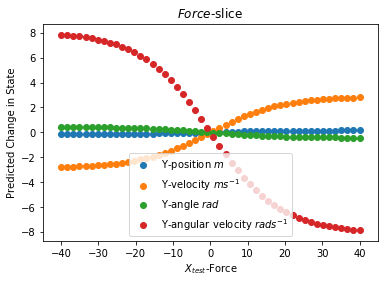

In [284]:
comparison_singleplot_real_1D_scan(50,"Force")

REAL DYNAMICS WITH FORCE INCLUDED

In [285]:
def dynamic(t,state):
    cart=CartPole()
    cart.setState(state[1:])
    S=np.reshape(state,(5,1))
    for i in range(int(t*10)):
            cart.performAction(S[0,i])
            cart.remap_angle()
            S1=cart.getState()
            S1=np.append([S[0,i]],S1)
            
            S1=np.reshape(S1,(5,1))
            S = np.hstack([S,S1]) 
    return S[1:,1:]

# a function that plots the dynamics using the interact function so it is more interractable.
def dynamic_plot(t=10,x=0,v=0,o=np.pi,w=0.,F=0):
    cart=CartPole()
    state=np.array([F,x,v,o,w])
    T=np.arange(0,t,cart.delta_time)
    S=dynamic(t,state)
    stateplot(T,S[0,:],S[1,:],S[2,:],S[3,:],'Time $s$','Position $m$','Velocity $ms^{-1}$','Angle $rad$','Angular Velocity $rads^{-1}$', r'State Plot: $Force$={} ,$x$={} $m$, $v$ = {} $ms$, $\theta$={} $rad$, $\omega$ = {} $rads$'.format(F,state[1], state[2],state[3],state[4]))

In [286]:
interact(dynamic_plot,t=(0,20,5), x=(-10, 10, 0.25), v=(-10, 10, 1), o=(-np.pi,np.pi,0.25),w=(-15,15,1),F=(-10,10,1));

interactive(children=(IntSlider(value=10, description='t', max=20, step=5), FloatSlider(value=0.0, description…

TASK 3.1

LINEAR MODEL

In [287]:
def linear_regression(n):
    X,Y=data(n,"Random")
    W=np.linalg.lstsq(X.T,Y.T)[0]
    return W

LINEAR MODEL 1D-SCAN

In [288]:
def comparison_linear_model_1D_scan(mode,n,W):
    X_test,Y_test=data(n,mode)
    Y_mean= np.matmul(W.T,X_test)
    if mode=="Force":
        stateplot_plot_comparison(X_test[0,:],Y_test,Y_mean,'$X_{test}$-Force $m$','Position $m$','Velocity $ms^{-1}$','Angle $rad$','Angular Velocity $rads^{-1}$',"1D Scan with respect to Force")
    elif mode=="Position":
        stateplot_plot_comparison(X_test[1,:],Y_test,Y_mean,'$X_{test}$-position $m$','Position $m$','Velocity $ms^{-1}$','Angle $rad$','Angular Velocity $rads^{-1}$',"1D Scan with respect to Position")
    elif mode=="Velocity":
        stateplot_plot_comparison(X_test[2,:],Y_test,Y_mean,'$X_{test}$-velocity $ms^{-1}$','Position $m$','Velocity $ms^{-1}$','Angle $rad$','Angular Velocity $rads^{-1}$',"1D Scan with respect to Velocity")
    elif mode=="Angle":
        stateplot_plot_comparison(X_test[3,:],Y_test,Y_mean,'$X_{test}$-angle $rad$','Position $m$','Velocity $ms^{-1}$','Angle $rad$','Angular Velocity $rads^{-1}$',"1D Scan with respect to Angle")
    elif mode=="Angular Velocity":
        stateplot_plot_comparison(X_test[4,:],Y_test,Y_mean,'$X_{test}$-angular velocity $rads^{-1}$','Position $m$','Velocity $ms^{-1}$','Angle $rad$','Angular Velocity $rads^{-1}$',"1D Scan with respect to Angular Velocity")

def comparison_single_plot_linear_1D_scan(n,mode,W):
    X_test,Y_test=data(n,mode)
    Y_mean= np.matmul(W.T,X_test)
    if mode=="Force":
        singleplot_scatter_4(X_test[0,:],Y_mean,'$X_{test}$-Force',"Predicted Change in State","Y-position $m$","Y-velocity $ms^{-1}$","Y-angle $rad$","Y-angular velocity $rads^{-1}$","$F$-slice")
    elif mode=="Position":
        singleplot_scatter_4(X_test[1,:],Y_mean,"X-position $m$","Predicted Change in State","Y-position $m$","Y-velocity $ms^{-1}$","Y-angle $rad$","Y-angular velocity $rads^{-1}$","$x$-slice")
    elif mode=="Velocity":
        singleplot_scatter_4(X_test[2,:],Y_mean,"X-Velocity $ms^{-1}$","Predicted Change in State","Y-position $m$","Y-velocity $ms^{-1}$","Y-angle $rad$","Y-angular velocity $rads^{-1}$","$v$-slice")
    elif mode=="Angle":
        singleplot_scatter_4(X_test[3,:],Y_mean,"X-Angle $rad$","Predicted Change in State","Y-position $m$","Y-velocity $ms^{-1}$","Y-angle $rad$","Y-angular velocity $rads^{-1}$","$\theta$-slice")
    elif mode=="Angular Velocity":
        singleplot_scatter_4(X_test[4,:],Y_mean,"X-Angular Velocity $rads^{-1}$","Predicted Change in State","Y-position $m$","Y-velocity $ms^{-1}$","Y-angle $rad$","Y-angular velocity $rads^{-1}$","$\omega$-slice")

    

In [289]:
W_linear=linear_regression(5000)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


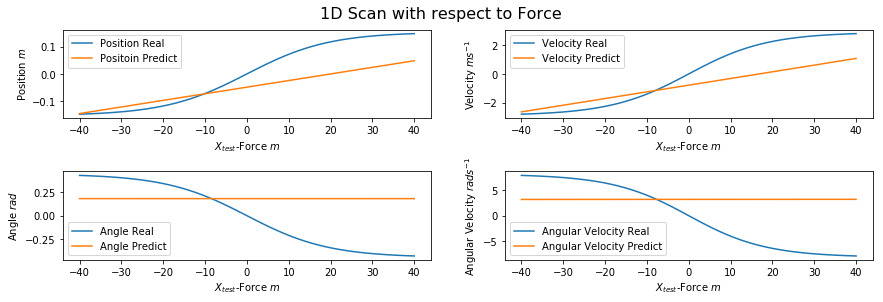

In [290]:
comparison_linear_model_1D_scan("Force",50,W_linear)


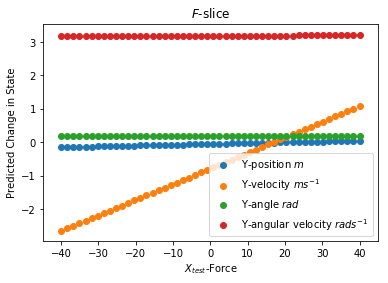

In [291]:
comparison_single_plot_linear_1D_scan(50,"Force",W_linear)

LINEAR DYNAMICS

In [292]:
# this funcition output a matrix which contains the predicted dynamics of the system
# using the linear regression model
def predict_dynamics_linear(W,t,state):
    S=np.matrix(state).T
    Y=np.empty((4,1))
    for i in range(int(t*10)):
        X=S[:,i]
        Y_predict=X[1:,:]+np.matmul(W.T,X)
        while Y_predict[2,0] < -np.pi:
            Y_predict[2,0] += 2. * np.pi
        while Y_predict[2,0] > np.pi:
            Y_predict[2,0] -= 2. * np.pi
        Y= np.hstack([Y,Y_predict])
        Y_predict=np.vstack([[S[0,i]],Y_predict])
        S = np.hstack([S,Y_predict])
    Y=Y[:,1:]
    return Y
# this funcitions compares the predicted dynamics wiht the actual dynamics of the system
def plot_dynamics_linear(t=100,F=0,x=0,v=0,o=np.pi,w=0):
    cart=CartPole()
    state=np.array([F,x,v,o,w])
    T=np.arange(0,t,cart.delta_time)
    Y_real=dynamic(t,state)
    Y_predict=predict_dynamics_linear(W_linear,t,state)
    stateplot_plot_comparison(T,Y_real,Y_predict,'Time $s$','Position $m$','Velocity $ms^{-1}$','Angle $rad$','Angular Velocity $rads^{-1}$', r" State Plot $x$={} m,$v$ = {} ms-1, $\theta$={} rad, $\omega$ = {} rads-1".format(state[0],state[1],state[2],state[3]))

In [293]:
interact(plot_dynamics_linear,F=(-2,2,0.2),t=(0,20,5), x=(-10, 10, 0.25), v=(-10, 10, 1), o=(-np.pi,np.pi,0.25),w=(-15,15,1));

interactive(children=(IntSlider(value=20, description='t', max=20, step=5), FloatSlider(value=0.0, description…

NON-LINEAR MODEL

KERNEL FUNCTION

In [294]:
def sum_inputs(X,Z):
    X = np.asarray(X)
    Z = np.asarray(Z)
    Diff=X[:,np.newaxis] - Z
    r2=Diff**2
    return r2

def sum_inputs_periodic(X,Z):
    X = np.asarray(X)
    Z = np.asarray(Z)
    Diff=X[:,np.newaxis] - Z
    r2=np.sin(Diff/2)**2
    return r2


def kernel_func(l,X,Z):
    
    pos_exp=sum_inputs(X[1,:].T,Z[1,:].T)/l[1]
    force_exp=sum_inputs(X[0,:].T,Z[0,:].T)/l[0]
    vel_exp=sum_inputs(X[2,:].T,Z[2,:].T)/l[2]
    angle_exp=sum_inputs_periodic(X[3,:].T,Z[3,:].T)/l[3]
    angvel_exp=sum_inputs(X[4,:].T,Z[4,:].T)/l[4]
    r2=force_exp+vel_exp+angle_exp+angvel_exp
    return np.exp(-0.5*r2)

REGULARISED LEAST SQUARES SOLUTION

In [295]:
def Regularised_Least_Squares(l,M,lambd,X,Y):
    X_basis=data(M,"Random")[0]
    K_mm=kernel_func(l,X_basis,X_basis)
   
    K_nm=kernel_func(l,X,X_basis)
    K_mn = K_nm.T
    
    b=np.matmul(K_mn,Y.T)
    A=np.matmul(K_mn,K_nm)+lambd*K_mm
    W=np.linalg.lstsq(A,b,rcond=0)[0]
    return W,X_basis

1D-SCAN NON-LINEAR

In [296]:
def comparison_nonlinear_model_1D_scan(mode,n,W_non_linear,X_basis,l):
    X_test,Y_test=data(n,mode)
    X_test_exp=kernel_func(l,X_test,X_basis)
    Y_mean= np.matmul(W_non_linear.T,X_test_exp.T)
    if mode=="Force":
        stateplot_plot_comparison(X_test[0,:],Y_test,Y_mean,'$X_{test}$-Force $m$','Position $m$','Velocity $ms^{-1}$','Angle $rad$','Angular Velocity $rads^{-1}$',"1D Scan with respect to Force")
    elif mode=="Position":
        stateplot_plot_comparison(X_test[1,:],Y_test,Y_mean,'$X_{test}$-position $m$','Position $m$','Velocity $ms^{-1}$','Angle $rad$','Angular Velocity $rads^{-1}$',"1D Scan with respect to Position")
    elif mode=="Velocity":
        stateplot_plot_comparison(X_test[2,:],Y_test,Y_mean,'$X_{test}$-velocity $ms^{-1}$','Position $m$','Velocity $ms^{-1}$','Angle $rad$','Angular Velocity $rads^{-1}$',"1D Scan with respect to Velocity")
    elif mode=="Angle":
        stateplot_plot_comparison(X_test[3,:],Y_test,Y_mean,'$X_{test}$-angle $rad$','Position $m$','Velocity $ms^{-1}$','Angle $rad$','Angular Velocity $rads^{-1}$',"1D Scan with respect to Angle")
    elif mode=="Angular Velocity":
        stateplot_plot_comparison(X_test[4,:],Y_test,Y_mean,'$X_{test}$-angular velocity $rads^{-1}$','Position $m$','Velocity $ms^{-1}$','Angle $rad$','Angular Velocity $rads^{-1}$',"1D Scan with respect to Angular Velocity")

        
def comparison_single_plot_nonlinear_1D_scan(n,mode,W_non_linear,X_basis,l):
    X_test,Y_test=data(n,mode)
    X_test_exp=kernel_func(l,X_test,X_basis)
    Y_mean= np.matmul(W_non_linear.T,X_test_exp.T)
    if mode=="Force":
        singleplot_scatter_4(X_test[0,:],Y_mean,'$X_{test}$-Force',"Predicted Change in State","Y-position $m$","Y-velocity $ms^{-1}$","Y-angle $rad$","Y-angular velocity $rads^{-1}$","$F$-slice")
    elif mode=="Position":
        singleplot_scatter_4(X_test[1,:],Y_mean,"X-position $m$","Predicted Change in State","Y-position $m$","Y-velocity $ms^{-1}$","Y-angle $rad$","Y-angular velocity $rads^{-1}$","$x$-slice")
    elif mode=="Velocity":
        singleplot_scatter_4(X_test[2,:],Y_mean,"X-Velocity $ms^{-1}$","Predicted Change in State","Y-position $m$","Y-velocity $ms^{-1}$","Y-angle $rad$","Y-angular velocity $rads^{-1}$","$v$-slice")
    elif mode=="Angle":
        singleplot_scatter_4(X_test[3,:],Y_mean,"X-Angle $rad$","Predicted Change in State","Y-position $m$","Y-velocity $ms^{-1}$","Y-angle $rad$","Y-angular velocity $rads^{-1}$","$\theta$-slice")
    elif mode=="Angular Velocity":
        singleplot_scatter_4(X_test[4,:],Y_mean,"X-Angular Velocity $rads^{-1}$","Predicted Change in State","Y-position $m$","Y-velocity $ms^{-1}$","Y-angle $rad$","Y-angular velocity $rads^{-1}$","$\omega$-slice")
    
    
        


In [297]:
lambd=5e-5
M=2500
X,Y=data(5000,"Random")
l=np.var(X,axis=1).T
W_non_linear,X_basis=Regularised_Least_Squares(l,M,lambd,X,Y)

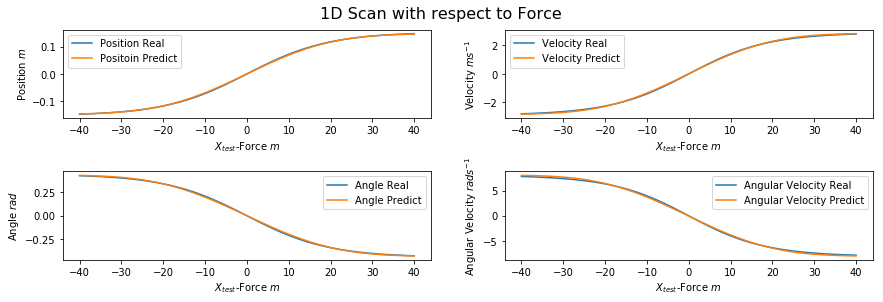

In [298]:
comparison_nonlinear_model_1D_scan("Force",100,W_non_linear,X_basis,l)

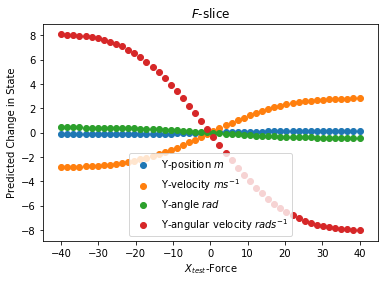

In [299]:
 comparison_single_plot_nonlinear_1D_scan(50,"Force",W_non_linear,X_basis,l)

PREDICTED DYNAMICS NON-LINEAR

In [300]:
# this funcition output a matrix which contains the predicted dynamics of the system
# using the linear regression model
def dynamics_non_linear(l,t,state):
    S=np.reshape(state,(5,1))
    X=np.empty((4,1))
    for i in range(int(t*10)):
        X_expanded=kernel_func(l,S,X_basis)
        X_expanded=np.reshape(X_expanded,(X_expanded.shape[0],X_expanded.shape[-1]))
        
        
        Y_mean=np.matmul(W_non_linear.T,X_expanded.T)
        #Y_mean[0,0]=np.matmul(W_linear.T[1,:],S)
        
        
        X_0=np.reshape(S[1:,0],(4,1))
        X_predict=X_0+Y_mean
        
        
        while X_predict[2,0] < -np.pi:
            X_predict[2,0] += 2. * np.pi
        while X_predict[2,0] > np.pi:
            X_predict[2,0] -= 2. * np.pi
            
        S_next=X_predict
        S=np.vstack([S[0],S_next])
        X= np.hstack([X,X_predict])
        
    X=X[:,1:]
    return X
# this funcitions compares the predicted dynamics wiht the actual dynamics of the system
def plot_dynamics_compare(t=20,F=0,x=0,v=0,o=np.pi,w=0):
    cart=CartPole()
    state=np.array([F,x,v,o,w])
    T=np.arange(0,t,cart.delta_time)
    Y_real=dynamic(t,state)
    Y_predict=dynamics_non_linear(l,t,state)
    stateplot_plot_comparison(T,Y_real,Y_predict,'Time $s$','Position $m$','Velocity $ms^{-1}$','Angle $rad$','Angular Velocity $rads^{-1}$', r" State Plot: $Force$={} $x$={} m,$v$ = {} ms-1, $\theta$={} rad, $\omega$ = {} rads-1".format(F,state[1],state[2],state[3],state[4]))

In [301]:
interact(plot_dynamics_compare,t=(0,10,20),F=(-20,20,2), x=(-10, 10, 0.25), v=(-10, 10, 1), o=(-np.pi,np.pi,0.25),w=(-15,15,1));

interactive(children=(IntSlider(value=10, description='t', max=10, step=20), IntSlider(value=0, description='F…

TASK 3.2

DEFINE THE LOSS FUNCTION

In [302]:
def _loss(state):
    angle = state[2]
    rot = state[3]
    # first of all, we want the pole to be upright (theta = 0), so we penalise theta away from that
    loss_angle_scale = np.pi/2.0
    loss_angle = 1.0-np.exp(-0.5*angle**2/loss_angle_scale**2)
    # but also, we want to HOLD it upright, so we also penalise large angular velocities, but only near
    # the upright position
    loss_velocity_scale = 0.1
    loss_velocity = (1.0-loss_angle)*(rot**2)*loss_velocity_scale
    return loss_angle + loss_velocity
    #return loss_angle


def loss_function(t,state):
    X=dynamic(t,state)
    L=np.array([0])
    for i in range(X.shape[1]):
        L=np.append(L,[_loss(X[:,i])])
    return L[1:]

    

In [303]:
def loss_func_cont(Ang,AngVel):
    angle = Ang
    rot = AngVel
    # first of all, we want the pole to be upright (theta = 0), so we penalise theta away from that
    loss_angle_scale = np.pi/2.0
    loss_angle = 1.0-np.exp(-0.5*angle**2/loss_angle_scale**2)
    # but also, we want to HOLD it upright, so we also penalise large angular velocities, but only near
    # the upright position
    loss_velocity_scale = 0.1
    loss_velocity = (1.0-loss_angle)*(rot**2)*loss_velocity_scale
    return loss_angle + loss_velocity
    #return loss_angle

def contour_loss(n):
    Ang=np.linspace(-np.pi,np.pi,int(n))
    AngVel=np.linspace(-5,5,int(n))
    Ang,AngVel=np.meshgrid(Ang,AngVel)
    L=loss_func_cont(Ang,AngVel)
    contour_plot(Ang,AngVel,L,"Angle $rad$","Angular Velocity $rad\,s^{-1}$","Loss Function")
    

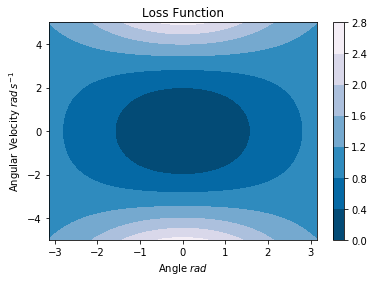

In [304]:
contour_loss(100)

INITIALISE A P-ARRAY

In [305]:
def p_scan(n,mode):
    if mode=="0":
        a1=np.linspace(-20,20,int(n))
        a2=np.zeros(n)
        a3=np.zeros(n)
        a4=np.zeros(n)
    if mode=="1":
        a1=np.zeros(n)
        a2=np.linspace(-20,20,int(n))
        a3=np.zeros(n)
        a4=np.zeros(n)
    if mode=="2":
        a1=np.zeros(n)
        a2=np.zeros(n)
        a3=np.linspace(-20,20,int(n))
        a4=np.zeros(n)
    if mode=="3":
        a1=np.zeros(n)
        a2=np.zeros(n)
        a3=np.zeros(n)
        a4=np.linspace(-20,20,int(n))
    if mode=="Random":
        a1=np.random.uniform(low=-10, high=-10, size=(int(n)))
        a2=np.random.uniform(low=-10, high=10, size=(int(n)))
        a3=np.random.uniform(low=-10, high=10, size=(int(n)))
        a4=np.random.uniform(low=-10, high=10, size=(int(n)))
    S=np.array([a1,a2,a3,a4])
    return S.T

CONTROL FUNCTION FOR THE REAL DYNAMICS

In [306]:

 
def control_real_dynamics(P,t,state):
    cart=CartPole()
    cart.setState(state)
    S1=cart.getState()
    S=np.reshape(state,(4,1))
    Force_arr=np.array([0])
    for i in range(int(t*10)):
        Force=np.dot(P,S1)
        cart.performAction(Force)
        cart.remap_angle()
        S1=cart.getState()
        S1_matrix=np.reshape(S1,(4,1))
        S = np.hstack([S,S1_matrix])
        Force_arr=np.append(Force_arr,Force)
    return S,Force_arr
def Roll_out_loss(P,t,state):
    X=control_real_dynamics(P,t,state)[0]
    L=0
    for i in range(X.shape[1]):
        L+=_loss(X[:,i])
    return L

1D-SCAN OF POLICY P

In [307]:
def P_1D_scan(n,mode,t,state):
    policy_scan=np.empty((2,1))
    P=p_scan(n,mode)
    for row in P:
        Loss_per_scan=Roll_out_loss(row,t,state)
        policy=np.array([[row[int(mode)],Loss_per_scan]])
        policy_scan=np.hstack([policy_scan,policy.T])
    return policy_scan[0,1:],policy_scan[1,1:]

def plot_P_1D_scan(n,t,state):
    L=np.empty((4,n))
    P=np.empty((4,n))
    P[0,:],L[0,:]= P_1D_scan(n,"0",t,state)
    P[1,:],L[1,:]= P_1D_scan(n,"1",t,state)
    P[2,:],L[2,:]= P_1D_scan(n,"2",t,state)
    P[3,:],L[3,:]= P_1D_scan(n,"3",t,state)
    multipleplot_scatter_8(P,L)
    



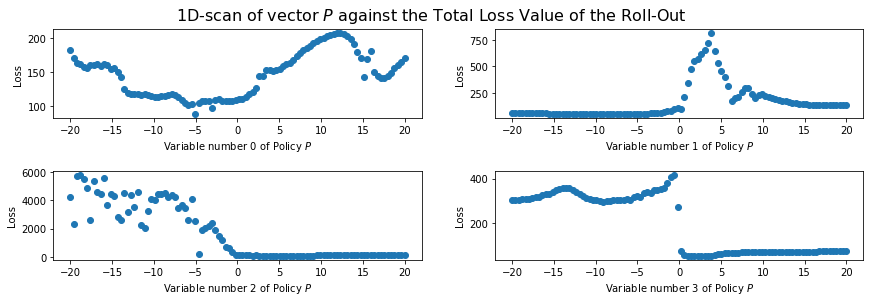

In [308]:
plot_P_1D_scan(100,5,[0,0,0.4,0])

2D-SCAN OF VECTOR P

In [309]:
def P_2D_grid(n,mode1,mode2):
    val1=np.linspace(-17,10,n)
    val2=np.linspace(-10,-1,n)
    P_1,P_2=np.meshgrid(val1,val2)
    P_1_flat=P_1.flatten()
    P_2_flat=P_2.flatten()
    P=np.zeros([4,P_1_flat.shape[0]])
    P[int(mode1),:]=P_1_flat
    P[int(mode2),:]=P_2_flat
    return P.T,P_1,P_2

def P_2D_scan(n,mode1,mode2,t,state):
    policy_scan=np.empty((3,1))
    P,P_1,P_2=P_2D_grid(n,mode1,mode2)
    for row in P:
        Loss_per_scan=Roll_out_loss(row,t,state)
        policy=np.array([[row[int(mode1)],row[int(mode2)],Loss_per_scan]])
        policy_scan=np.hstack([policy_scan,policy.T])
        
    L=np.reshape(policy_scan[2,1:],P_1.shape)
    contour_plot(P_1,P_2,L,"Variable "+mode1+" of $P$","Variable "+mode2+" of $P$","2D scan of total loss of roll out with Variable "+mode1+" and "+mode2+" of $P$")
    

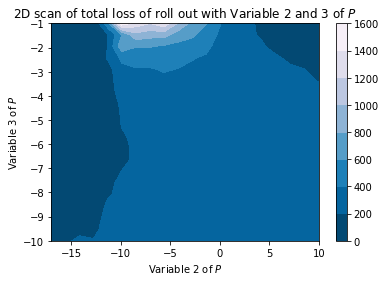

In [310]:
P_2D_scan(20,"2","3",5,[0,0,0.4,0])

OPTIMIZATION FOR THE REAL DYNAMICS

In [311]:
def opt(t,state,func):
    P_init=np.array([0,0,-15,-5])
    #P_init=p_scan(1,"Random")
    #P_init=P_init[0,:]
    print(P_init)
    p_opt=optimize.minimize(func,P_init,(t,state), method='Nelder-Mead')
    return p_opt
    
    
    

In [386]:
t=15
state=[0,0,np.pi,0]

In [387]:
A=opt(t,state,Roll_out_loss)
print(A)

[  0   0 -15  -5]
 final_simplex: (array([[ -0.03507308,   0.02327841, -11.11119827,  -2.74991762],
       [ -0.03508068,   0.0232828 , -11.11110917,  -2.74989294],
       [ -0.03506195,   0.02327203, -11.11126304,  -2.74993367],
       [ -0.03505648,   0.02326892, -11.11125634,  -2.74992829],
       [ -0.03505996,   0.02327093, -11.11120313,  -2.74991311]]), array([18.06750504, 18.06753329, 18.06754583, 18.06756076, 18.06757854]))
           fun: 18.06750503955706
       message: 'Optimization terminated successfully.'
          nfev: 722
           nit: 428
        status: 0
       success: True
             x: array([ -0.03507308,   0.02327841, -11.11119827,  -2.74991762])


In [388]:
P_real=A.x


LINEAR POLICY CONTROL FOR THE REAL DYNAMICS

In [390]:
def plot_control_real_dynamics(t,state,P):
    X,Force=control_real_dynamics(P,t,state)
    T=np.arange(0,t+0.1,0.1)
    stateplot_5(T,X[0,:],X[1,:],X[2,:],X[3,:],Force,'Time $s$','Position $m$','Velocity $ms^{-1}$','Angle $rad$','Angular Velocity $rads^{-1}$',"Force", r'State Plot $x$={} $m$, $v$ = {} $ms$, $\theta$={} $rad$, $\omega$ = {} $rads$'.format(state[0],state[1],state[2],state[3]))  

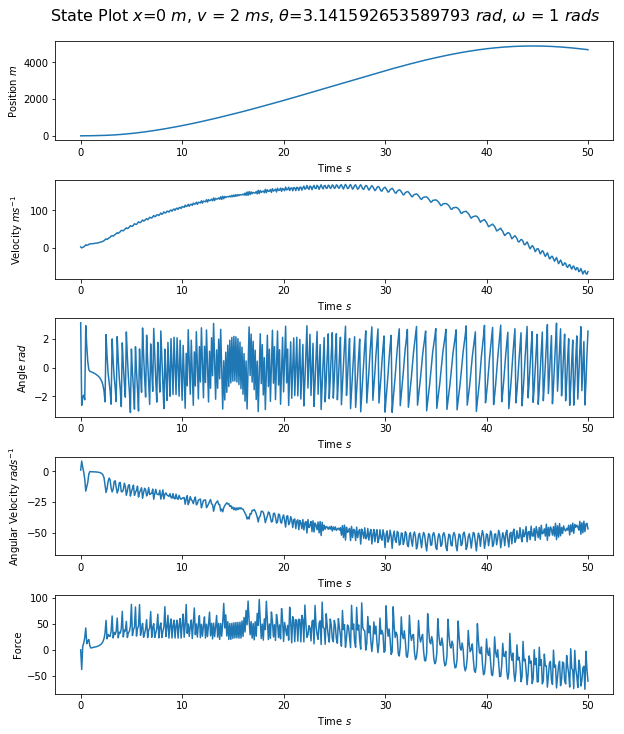

53135.00633420121

In [391]:
plot_control_real_dynamics(t,state,P_real)
Roll_out_loss(P_real,t,state)

CONTROL FUNCTION FOR NON-LINEAR MODEL PREDICTED DYNAMICS

In [392]:
def control_predicted_dynamics(P,t,state,W_non_linear,X_basis,l):
    S=np.array(state)
    X=np.reshape(S,(4,1))
    X_previous=np.reshape(S,(4,1))
    Force_array=np.array([0])
    for i in range(int(t*10)):
        Force=np.dot(P,S)
        Force_array=np.append(Force_array,Force)
        S_exp=np.append([Force],S)
        S_matrix=np.reshape(S_exp,(5,1))
        X_expanded=kernel_func(l,S_matrix,X_basis)
        X_expanded=np.reshape(X_expanded,(X_expanded.shape[0],X_expanded.shape[-1]))
        
        
        Y_mean=np.matmul(W_non_linear.T,X_expanded.T)
        #Y_mean[0,0]=np.matmul(W_linear.T[1,:],S)
        S=np.reshape(S,(4,1))
        X_predict=S+Y_mean
        X_predict[2,0]=remap(X_predict[2,0])
        
        
    
            
        S=X_predict
        X= np.hstack([X,X_predict])
        
    return np.reshape(X,(X.shape[0],X.shape[1])),Force_array

def Roll_out_loss_non_linear(P,t,state,W_non_linear,X_basis,l):
    X=control_predicted_dynamics(P,t,state,W_non_linear,X_basis,l)[0]
    X=np.squeeze(np.asarray(X))
    L=0
    for i in range(X.shape[1]):
        L+=_loss(np.asarray(X[:,i]))
    return L
    

OPTIMIZING FOR THE NON-LINEAR MODEL

In [393]:
def opt_non_linear(t,state,W,X_bas,l,func):
    P_init=np.array([0,0,-15,-5])
    #P_init=p_scan(1,"Random")
    #P_init=P_init[0,:]
    print(P_init)
    p_opt=optimize.minimize(func,P_init,(t,state,W,X_bas,l), method='Nelder-Mead')
    return p_opt

In [395]:
B=opt_non_linear(t,state,W_non_linear,X_basis,l,Roll_out_loss_non_linear)
print(B)
P_non_lin=B.x

[  0   0 -15  -5]
 final_simplex: (array([[ 1.11634664e-02, -2.08672433e-02, -1.48817640e+01,
        -4.75239605e+00],
       [ 1.11569403e-02, -2.08546636e-02, -1.48816791e+01,
        -4.75236552e+00],
       [ 1.11591127e-02, -2.08589177e-02, -1.48818037e+01,
        -4.75240530e+00],
       [ 1.11578302e-02, -2.08563966e-02, -1.48817162e+01,
        -4.75237753e+00],
       [ 1.11632266e-02, -2.08667792e-02, -1.48817580e+01,
        -4.75239402e+00]]), array([18.33676899, 18.33676899, 18.33676901, 18.33676903, 18.33676903]))
           fun: 18.336768990473384
       message: 'Optimization terminated successfully.'
          nfev: 437
           nit: 247
        status: 0
       success: True
             x: array([ 1.11634664e-02, -2.08672433e-02, -1.48817640e+01, -4.75239605e+00])


LINEAR POLICY CONTROL FOR THE NON-LINEAR PREDICTED DYNAMICS

In [397]:
def plot_control_predicted_dynamics(t,state,P,W_nl,X_bas,l):
    X,F=control_predicted_dynamics(P,t,state,W_nl,X_bas,l)
    T=np.arange(0,t+0.1,0.1)
    stateplot_5(T,X[0,:],X[1,:],X[2,:],X[3,:],F,'Time $s$','Position $m$','Velocity $ms^{-1}$','Angle $rad$','Angular Velocity $rads^{-1}$',"Force", r'State Plot $x$={} $m$, $v$ = {} $ms$, $\theta$={} $rad$, $\omega$ = {} $rads$'.format(state[0],state[1],state[2],state[3]))
    

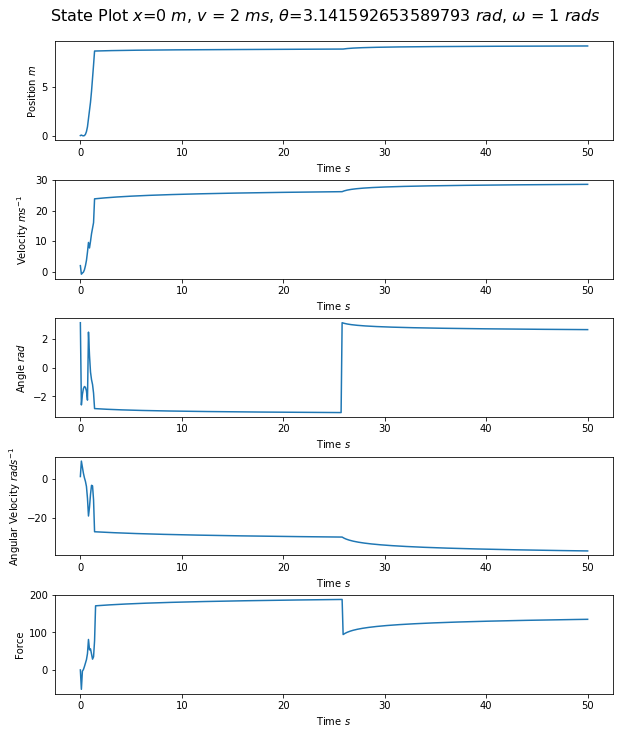

In [398]:
plot_control_predicted_dynamics(t,state,P_non_lin,W_non_linear,X_basis,l)

COMPARISON BETWEEN THE REAL DYNAMICS CONTROL AND NON-LINEAR MODEL CONTROL

In [399]:
def plot_control_comparison_lin_policy(t,state,P_r,P_p,W_nl,X_bas,l):
    X_p,F_p=control_predicted_dynamics(P_p,t,state,W_nl,X_bas,l)
    X_r,F_r=control_real_dynamics(P_r,t,state)
    T=np.arange(0,t+0.1,0.1)
    stateplot_plot_comparison_5_group(T,X_r,X_p,F_r,F_p,'Time $s$','Position $m$','Velocity $ms^{-1}$','Angle $rad$','Angular Velocity $rads^{-1}$',"Force", r'State Plot $x$={} $m$, $v$ = {} $ms$, $\theta$={} $rad$, $\omega$ = {} $rads$'.format(state[0],state[1],state[2],state[3]))
    

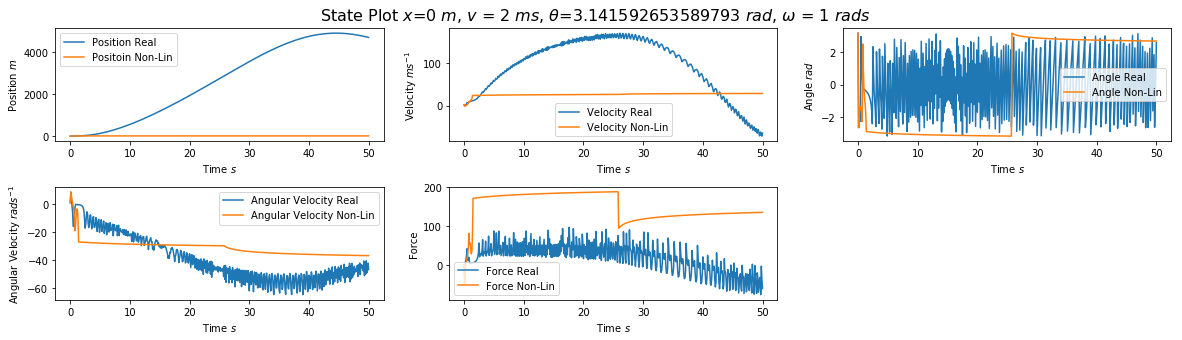

In [400]:
plot_control_comparison_lin_policy(t,state,P_real,P_non_lin,W_non_linear,X_basis,l)